# Model of JPA

$$ 
Z = Z_{cin} + Z_{LC}
$$
$$
Z_{cin} = \frac{1}{i\omega C_{in}}
$$

$Z_{LC}$ is the parallel combination of $Z_C = \frac{1}{i\omega C_0}$ and $Z_L = i\omega (L_0 + \frac{L_J}{\cos{2\pi\phi}})$, which combine to 

$$
Z_{LC} = \frac{Z_C Z_L}{Z_C + Z_L}
$$


$$
Z_{LC} = \frac{\frac{1}{i\omega C_0} i\omega (L_0 + \frac{L_J}{\cos{2\pi\phi}})}{\frac{1}{i\omega C_0} + i\omega (L_0 + \frac{L_J}{\cos{2\pi\phi}})}
$$


$$
 = \frac{\frac{1}{ C_0} (L_0 + \frac{L_J}{\cos{2\pi\phi}})}{ \frac{1}{i\omega C_0} + i\omega (L_0 + \frac{L_J}{\cos{2\pi\phi}} )}\left(\frac{i\omega C_0}{i\omega C_0}\right)
$$

$$
Z_{JPA} = \frac{1}{i\omega C_{in}} +  \frac{i\omega(L_0 + \frac{L_J}{\cos{2\pi\phi}})}{1 - \omega^2C_0(L_0 + \frac{L_J}{\cos{2\pi\phi}})}
$$

In [1]:
# load needed python libraries matplotlib, numpy, and scikit-rf
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf
import json
from skrf.media import *
from skrf import Frequency

In [3]:
fghz = np.linspace(1,10,1000)

In [7]:
f = fghz*1e9
omega = 2*np.pi*f

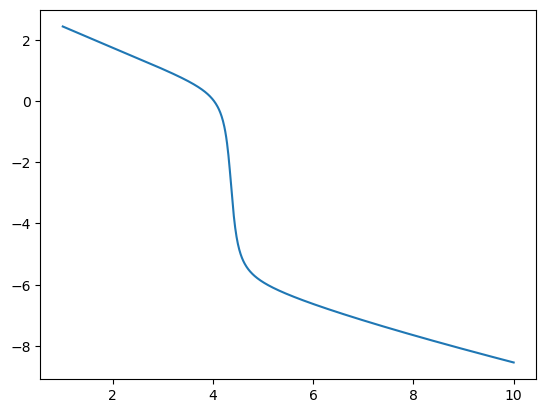

In [55]:
Cin = 0.6e-12
C0 = 6e-12
L0 = 50e-12
Lj = 10e-12
f_360 = 3e9
f = 1e9*fghz
omega = 2*np.pi*f
phi = 0.24
Z_jpa = (1/(1j*omega*Cin)) + (1j*omega*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))/(1 - omega*omega*C0*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))))
s_jpa = (50 - Z_jpa)/(50 + Z_jpa)
phaseshift = np.exp(-1j*omega/(2*np.pi*f_360))
s_jpa_unwrapped = (np.angle(phaseshift*s_jpa))  
plt.plot(fghz,np.unwrap(s_jpa_unwrapped))

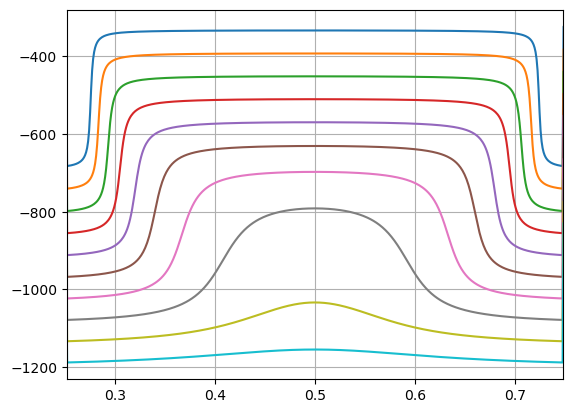

In [123]:
Cin = 0.8e-12
C0 = 6e-12
L0 = 40e-12
Lj = 40e-12
f = 1e9*fghz
omega = 2*np.pi*f
phi = 0.24
f_360 = 0.5e9

phasetheory2d = []
phiwavetheory = np.linspace(0,1,1000)
for phi in np.linspace(0,1,1000):
    Z_jpa = (1/(1j*omega*Cin)) + (1j*omega*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))/(1 - omega*omega*C0*(L0 + Lj/np.abs(np.cos(2*np.pi*phi)))))
    s_jpa = (50 - Z_jpa)/(50 + Z_jpa)
    phaseshift = np.exp(-1j*omega/(2*np.pi*f_360))
    s_jpa_unwrapped = np.unwrap(np.angle(phaseshift*s_jpa))
    phasetheory2d.append(s_jpa_unwrapped)
phasetheory2d = np.array(phasetheory2d)
#plt.imshow(np.unwrap(phasetheory2d.transpose()))
for index in range(10):
    plt.plot(phiwavetheory,180*phasetheory2d.transpose()[300 + 50*index]/np.pi)
plt.xlim(0.252,0.748)
plt.grid()

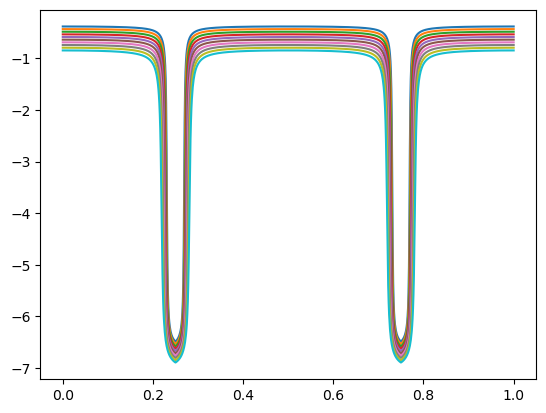

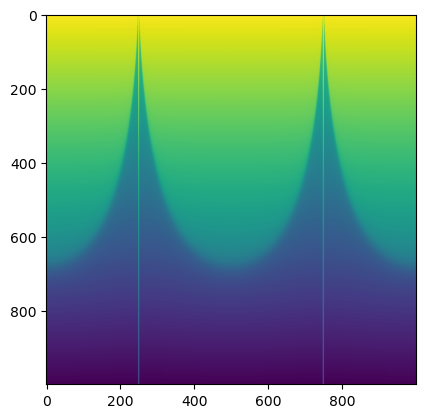

In [111]:
plt.imshow((phasetheory2d.transpose()))